# a. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras import layers,models

#StandardScaler is a preprocessing technique used to standardize or scale features in your dataset so that they have a mean of 0 and a standard deviation of 1.

# b. Upload/access the dataset

In [3]:
dataset=pd.read_csv("D:\DL\creditcard.csv")

In [4]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
scaler=StandardScaler()    #StandardScaler is used to standardize (or scale) the features of your dataset.
x=scaler.fit_transform(dataset.drop("Class", axis=1))
y=dataset["Class"]

In [6]:
#split dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# x: feature matrix
# y: target vector
# test_size=0.2 means that 20% of the data will be used for testing, while the remaining 80% will be used for training.
# random_state: It ensures that the data split will be the same every time you run the code with the same random speed

In [7]:
input_dim=x_train.shape[1] 
# calculates and assigns the number of input features (dimensions) to the variable input_dim
# first element of the tuple represents the number of samples (rows), and the second element represents the number of features (columns) in the training data.
# extracts the second element of the shape tuple, which is the number of features (input dimensions) in the training data. 

# c. Encoder convert it into latent representation

In [9]:
encoder=models.Sequential([   #linear stack of layers
    layers.Input(shape=(input_dim,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu')
])

# d. Decoder networks convert it back to the original input

In [10]:
decoder=models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(input_dim,activation='linear')
])

#the decoder is responsible for reconstructing the original input data from a lower-dimensional representation produced by the encoder.
# linear:  used in the output layer of autoencoders when the goal is to reconstruct the original data because it allows the network to predict continuous values without any nonlinear transformations.

In [11]:
autoencoder=models.Sequential([
    encoder,
    decoder
])

# e. Complie the models with optimizer,Loss and Evaluation Metrics 

In [15]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
autoencoder.fit( x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))
# Shuffling the training data ensures that the order of the data doesn't impact the training proces

Epoch 1/10
7121/7121 [==============================] - 41s 6ms/step - loss: 0.3527 - val_loss: 0.2138
Epoch 2/10
7121/7121 [==============================] - 34s 5ms/step - loss: 0.1876 - val_loss: 0.1738
Epoch 3/10
7121/7121 [==============================] - 33s 5ms/step - loss: 0.1583 - val_loss: 0.1455
Epoch 4/10
7121/7121 [==============================] - 39s 5ms/step - loss: 0.1305 - val_loss: 0.1192
Epoch 5/10
7121/7121 [==============================] - 38s 5ms/step - loss: 0.1187 - val_loss: 0.1111
Epoch 6/10
7121/7121 [==============================] - 38s 5ms/step - loss: 0.1145 - val_loss: 0.1118
Epoch 7/10
7121/7121 [==============================] - 38s 5ms/step - loss: 0.1126 - val_loss: 0.1071
Epoch 8/10
7121/7121 [==============================] - 36s 5ms/step - loss: 0.1098 - val_loss: 0.0944
Epoch 9/10
7121/7121 [==============================] - 36s 5ms/step - loss: 0.0933 - val_loss: 0.0868
Epoch 10/10
7121/7121 [==============================] - 35s 5ms/step - l

In [17]:
y_pred=autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - y_pred,2), axis=1)

1781/1781 [==============================] - 6s 3ms/step


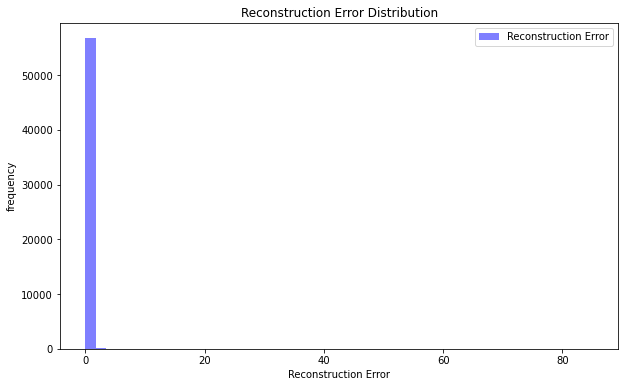

In [21]:
plt.figure(figsize=(10,6))
plt.hist(mse, bins=50, alpha=0.5, color='b', label='Reconstruction Error')
plt.xlabel("Reconstruction Error")
plt.ylabel("frequency")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

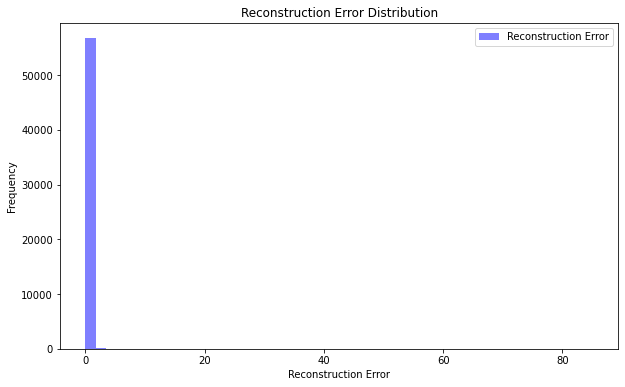

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.5, color='b', label='Reconstruction Error')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

In [24]:
thresholds=np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    anomalies = mse>threshold
    
num_anomalies=np.sum(anomalies)
print(f"Threshold: {threshold:.1f}, Number of anomalies: {num_anomalies}")

Threshold: 0.9, Number of anomalies: 567


In [25]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, anomalies))

print("\nClassification Report: ")
print(classification_report(y_test, anomalies))

Confusion Matrix: 
[[56349   515]
 [   46    52]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.09      0.53      0.16        98

    accuracy                           0.99     56962
   macro avg       0.55      0.76      0.58     56962
weighted avg       1.00      0.99      0.99     56962



In [26]:
import seaborn as sns

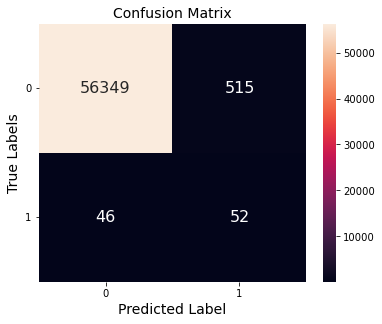

In [29]:
plt.figure(figsize=(6, 4.75))
sns.heatmap(confusion_matrix(y_test, anomalies), annot=True, annot_kws={"size": 16}, fmt='d')
plt.xticks([0.5, 1.5], rotation='horizontal')
plt.yticks([0.5, 1.5], rotation='horizontal')
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=14)
plt.show()


# annot=True: want to display the numerical values in the cells of the heatmap. 
# fmt='d': format for displaying the numbers as integers 